In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares as nls

In [4]:
def Read_file(filename):
    data = []
    filename = filename + ".txt"
    file = open(filename, "r")
    for coor in file:
        data.append(coor.split())
    data = np.array(data, dtype='float')
    x = data[:,0]
    y = data[:,1]
    return x, y

In [5]:
def Least_squares(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    plt.figure(figsize=(16,14))
    plt.plot(x, y, 'o', label="Original Data", markersize=2)
    plt.plot(x, m*x + c, "r", label="Fitted Line")
    plt.legend()
    plt.show()

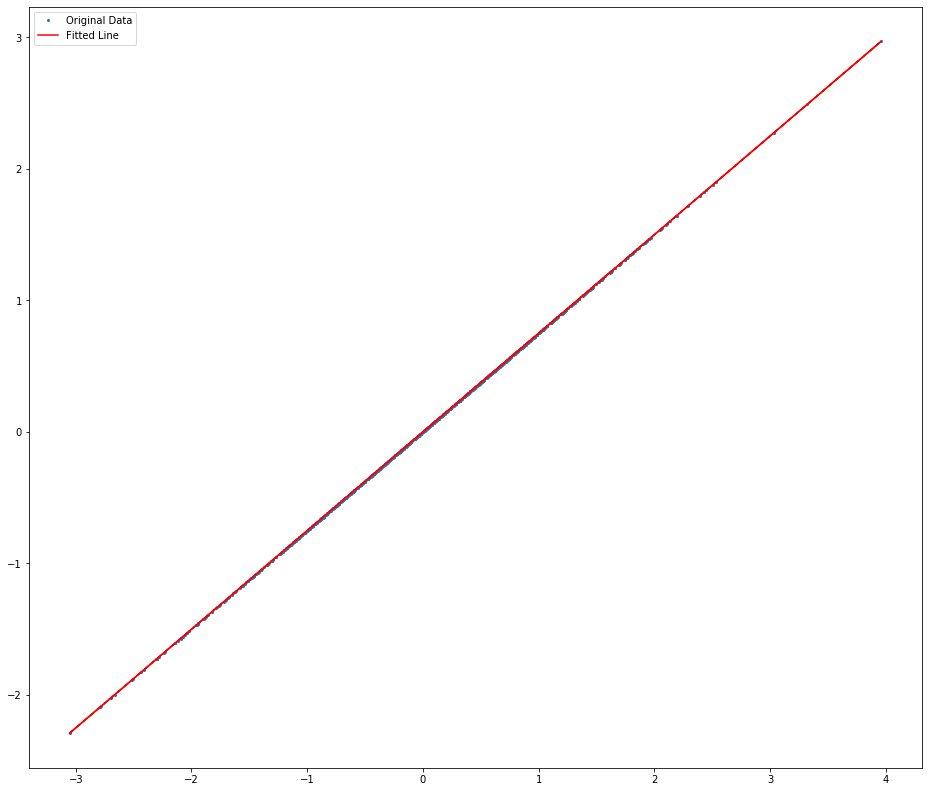

In [6]:
x, y = Read_file("linear_function_data")
Least_squares(x, y)

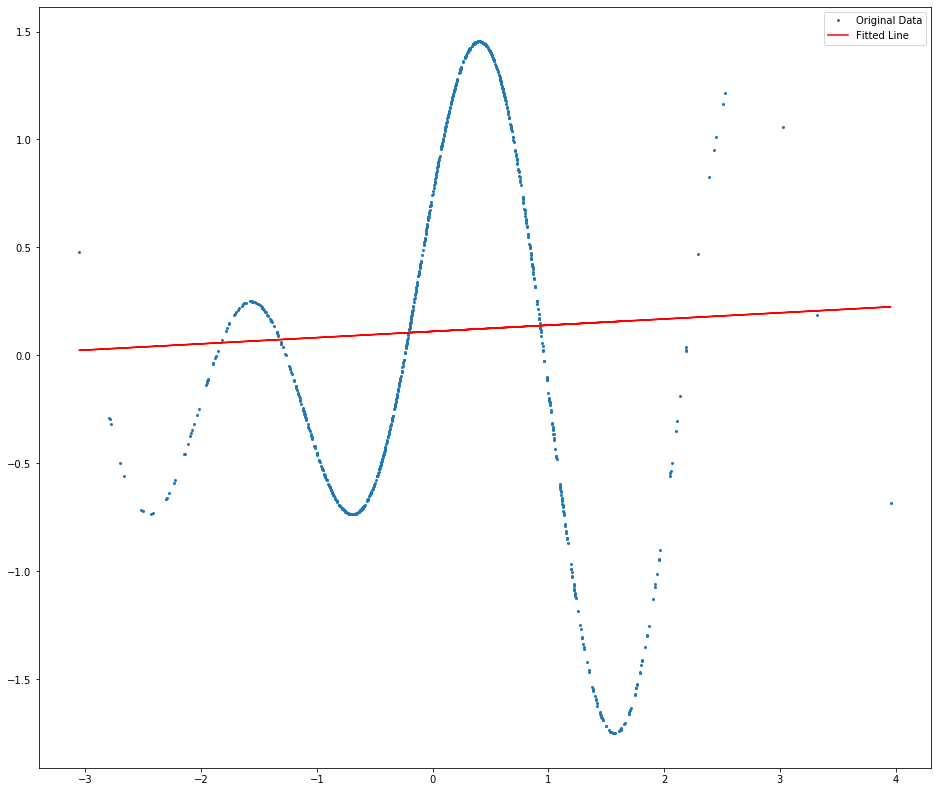

In [7]:
X, Y = Read_file("nonlinear_function_data")
Least_squares(X, Y)

In [8]:
def Nonlinear_least_squares(X, Y):
    
    def generate_data(t, A, sigma, omega, noise=0, n_outliers=0, random_state=0):
        y = A * np.exp(-sigma * t) * np.sin(omega * t)
        rnd = np.random.RandomState(random_state)
        error = noise * rnd.randn(t.size)
        outliers = rnd.randint(0, t.size, n_outliers)
        error[outliers] *= 35
        return y + error
    
    A = 2
    sigma = 0.1
    omega = 0.1 * 2 * np.pi

    noise = 0.1
    t_min = min(X)
    t_max = max(X)
    t_train = X
    y_train = Y
    def fun(x, t, y):
        return x[0] * np.exp(-x[1] * t) * np.sin(x[2] * t) - y
    x0 = np.ones(3)
    res_lsq = nls(fun, x0, args=(t_train, y_train))
    t_test = np.linspace(t_min, t_max, 10000)
    y_test = generate_data(t_test, A, sigma, omega)
    y_lsq = generate_data(t_test, *res_lsq.x)
    plt.figure(figsize=(16,14))
    plt.plot(t_train, y_train, 'o', label='data')
    plt.plot(t_test, y_lsq, label='lsq')
    plt.xlabel('$t$')
    plt.ylabel('$y$')
    plt.legend();

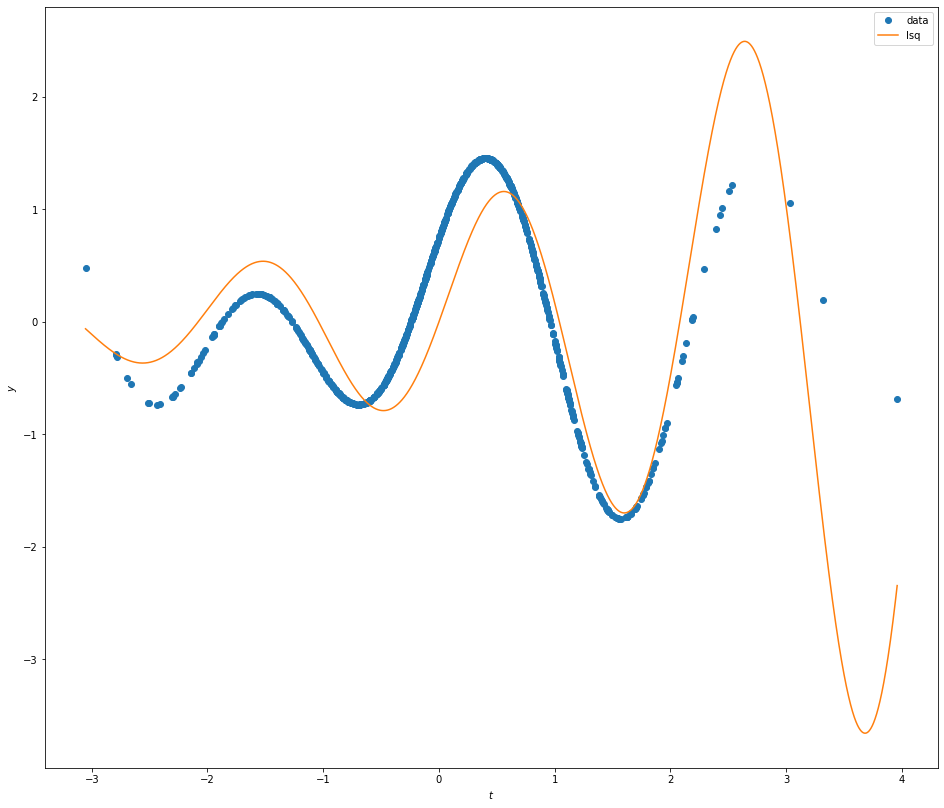

In [9]:
X, Y = Read_file("nonlinear_function_data")
Nonlinear_least_squares(X, Y)